In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('final.csv')
df.shape

(3578, 15)

In [3]:
df.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
2719,21,1.574,54.0,21.77,No,No_delivary,110,70,Normal,Normal,No,No,No,0,0
538,21,1.549,72.0,29.99,No,No_delivary,120,80,Modarate,Normal,No,No,No,0,1
1444,20,1.524,60.0,25.83,No,No_delivary,110,80,High,Normal,No,No,Yes,0,1
1028,23,1.549,66.0,27.49,No,No_delivary,120,80,Normal,Normal,No,No,No,0,1
2861,26,1.422,43.0,21.25,No,No_delivary,140,80,Normal,Normal,No,No,Yes,0,3


In [4]:
df1 = df.copy()
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
0,26,1.346,95.0,52.42,No,Normal,120,80,Normal,Normal,No,No,Yes,1,2
1,26,1.346,95.0,52.42,No,Normal,140,60,Normal,Normal,No,No,Yes,1,2
2,18,1.244,78.0,50.40,No,Normal,120,70,Normal,Normal,No,No,Yes,1,3
3,26,1.270,77.0,47.74,No,Normal,100,60,Normal,Normal,No,No,Yes,1,2
4,26,1.270,77.0,47.74,No,Normal,110,80,Normal,Normal,No,No,Yes,1,2


# Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
columns = ['Age', 'Height', 'Blood Group ( is Negative?)',
       'Delivery Type', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Edema', 'Anemia', 'Jaundice', 'Diabetes','Para','Gravida']
columns

['Age',
 'Height',
 'Blood Group ( is Negative?)',
 'Delivery Type',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Edema',
 'Anemia',
 'Jaundice',
 'Diabetes',
 'Para',
 'Gravida']

In [7]:
df1['Risk'].value_counts()

No     2589
Yes     989
Name: Risk, dtype: int64

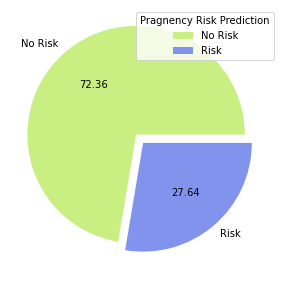

In [8]:
plt.figure(figsize=(10,5))
plt.pie(df1['Risk'].value_counts(), labels=['No Risk','Risk'], autopct = "%0.2f",explode = [0.1,0],colors = ['#c9ee82','#8293ee'])
plt.legend(title = "Pragnency Risk Prediction")
plt.show()

In [9]:
# for x in columns:
#     plt.figure(figsize=(15,5))
#     plt.title(x)
#     sns.countplot(data=df1, x=x, hue="Risk")
# plt.tight_layout()

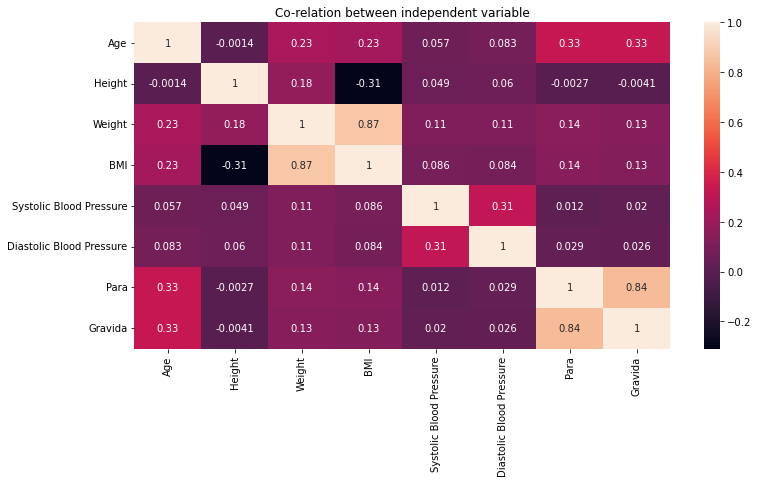

In [10]:
plt.figure(figsize=(12,6))
plt.title("Co-relation between independent variable")
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Data Preprocessing

In [11]:
df1.dtypes

Age                              int64
Height                         float64
Weight                         float64
BMI                            float64
Blood Group ( is Negative?)     object
Delivery Type                   object
Systolic Blood Pressure          int64
Diastolic Blood Pressure         int64
Edema                           object
Anemia                          object
Jaundice                        object
Diabetes                        object
Risk                            object
Para                             int64
Gravida                          int64
dtype: object

In [12]:
df1.isna().sum()

Age                            0
Height                         0
Weight                         0
BMI                            0
Blood Group ( is Negative?)    0
Delivery Type                  0
Systolic Blood Pressure        0
Diastolic Blood Pressure       0
Edema                          0
Anemia                         0
Jaundice                       0
Diabetes                       0
Risk                           0
Para                           0
Gravida                        0
dtype: int64

In [13]:
# df1.loc[df1.Height.isna()]

In [14]:
height_nan_index = df1['Height'].index[df1['Height'].apply(np.isnan)]
height_nan_index

Int64Index([], dtype='int64')

In [15]:
df1.Height = df1.Height.fillna(df1.Height.mean())

In [16]:
df1.Height.isna().sum()

0

In [17]:
for i in height_nan_index:
    df1.BMI[i] = (round((float(df1.Weight[i]) / df1.Height[i] ** 2), 2))

In [18]:
df1.isna().sum()

Age                            0
Height                         0
Weight                         0
BMI                            0
Blood Group ( is Negative?)    0
Delivery Type                  0
Systolic Blood Pressure        0
Diastolic Blood Pressure       0
Edema                          0
Anemia                         0
Jaundice                       0
Diabetes                       0
Risk                           0
Para                           0
Gravida                        0
dtype: int64

In [19]:
bmi_nan_index = df1['BMI'].index[df1['BMI'].apply(np.isnan)]
bmi_nan_index

Int64Index([], dtype='int64')

In [20]:
for i in bmi_nan_index:
    df1.BMI[i] = (round((float(df1.Weight[i]) / df1.Height[i] ** 2), 2))

In [21]:
df1.isna().sum()

Age                            0
Height                         0
Weight                         0
BMI                            0
Blood Group ( is Negative?)    0
Delivery Type                  0
Systolic Blood Pressure        0
Diastolic Blood Pressure       0
Edema                          0
Anemia                         0
Jaundice                       0
Diabetes                       0
Risk                           0
Para                           0
Gravida                        0
dtype: int64

In [22]:
df1['Systolic Blood Pressure'] = df1['Systolic Blood Pressure'].fillna(120)

In [23]:
df1['Diastolic Blood Pressure'] = df1['Diastolic Blood Pressure'].fillna(80)

In [24]:
df1.isna().sum()

Age                            0
Height                         0
Weight                         0
BMI                            0
Blood Group ( is Negative?)    0
Delivery Type                  0
Systolic Blood Pressure        0
Diastolic Blood Pressure       0
Edema                          0
Anemia                         0
Jaundice                       0
Diabetes                       0
Risk                           0
Para                           0
Gravida                        0
dtype: int64

# Model Building

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk']
for x in col:
    df1[x] = encoder.fit_transform(df[x])
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
0,26,1.346,95.0,52.42,0,Normal,120,80,Normal,Normal,0,0,1,1,2
1,26,1.346,95.0,52.42,0,Normal,140,60,Normal,Normal,0,0,1,1,2
2,18,1.244,78.0,50.40,0,Normal,120,70,Normal,Normal,0,0,1,1,3
3,26,1.270,77.0,47.74,0,Normal,100,60,Normal,Normal,0,0,1,1,2
4,26,1.270,77.0,47.74,0,Normal,110,80,Normal,Normal,0,0,1,1,2


In [26]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.sample(2)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Systolic Blood Pressure,Diastolic Blood Pressure,Jaundice,Diabetes,Risk,Para,Gravida,Delivery Type_No_delivary,Delivery Type_Normal,Edema_Modarate,Edema_Normal,Anemia_Normal,Anemia_Very-Low
1636,27,1.473,55.0,25.34,0,120,70,1,0,1,1,3,0,1,0,1,1,0
317,23,1.524,73.5,31.65,1,145,60,0,0,1,1,2,0,1,0,1,0,0


In [27]:
X = df2.drop(['Risk','Height','Weight'],axis=1)

In [28]:
y = df2.Risk

In [36]:
from sklearn.svm import SVC

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(SVC(),X,y, cv=20, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.75

Classification Report : 
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      2589
           1       0.94      0.11      0.20       989

    accuracy                           0.75      3578
   macro avg       0.84      0.55      0.52      3578
weighted avg       0.80      0.75      0.67      3578



In [37]:
from sklearn.ensemble import RandomForestClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(RandomForestClassifier(),X,y, cv=20, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.84

Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2589
           1       0.70      0.75      0.73       989

    accuracy                           0.84      3578
   macro avg       0.80      0.82      0.81      3578
weighted avg       0.85      0.84      0.85      3578



In [38]:
from sklearn.tree import DecisionTreeClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(DecisionTreeClassifier(),X,y, cv=20, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.67

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.66      0.74      2589
           1       0.44      0.70      0.54       989

    accuracy                           0.67      3578
   macro avg       0.64      0.68      0.64      3578
weighted avg       0.74      0.67      0.68      3578



In [32]:
from sklearn.linear_model import LogisticRegression

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(LogisticRegression(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.8

Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      2589
           1       0.93      0.29      0.44       989

    accuracy                           0.80      3578
   macro avg       0.86      0.64      0.66      3578
weighted avg       0.82      0.80      0.76      3578



In [39]:
from sklearn.neighbors import KNeighborsClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(KNeighborsClassifier(),X,y, cv=20, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.82

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2589
           1       0.76      0.50      0.60       989

    accuracy                           0.82      3578
   macro avg       0.80      0.72      0.74      3578
weighted avg       0.81      0.82      0.80      3578



In [34]:
from sklearn.naive_bayes import GaussianNB

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(GaussianNB(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.78

Classification Report : 
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2589
           1       0.99      0.19      0.32       989

    accuracy                           0.78      3578
   macro avg       0.88      0.59      0.59      3578
weighted avg       0.83      0.78      0.71      3578



In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score,recall_score
import seaborn as sns

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(MultinomialNB(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.78

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2589
           1       0.98      0.20      0.33       989

    accuracy                           0.78      3578
   macro avg       0.87      0.60      0.60      3578
weighted avg       0.82      0.78      0.72      3578

